In [210]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
import pandas as pd
import io
import itertools

In [211]:
human_chy = '../data/Homo_sapiens.GRCh38.dna_sm.chromosome.Y.fa'
motifs_input = '../data/human_motifs.fa'

In [212]:
def seq_ACGT(seuil_proba, motif,file):
    seq_ACGT = []
    for i in range(0,len(motif), 4):
        seq = motif[i:i+4]
        tmp = []
        if float(seq[0]) >= seuil_proba:
            tmp.append('A')
        if float(seq[1]) >= seuil_proba:
            tmp.append('C')
        if float(seq[2]) >= seuil_proba:
            tmp.append('G')
        if float(seq[3]) >= seuil_proba:
            tmp.append('T')
        seq_ACGT.append(tmp)
    file.write('\n'.join(map(''.join,list(itertools.product(*seq_ACGT)))))
    file.write('\n')

In [ ]:
with open(motifs_input) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq_ADN = []
    lengths = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq_ADN.append(seq_record.seq)
        lengths.append(len(seq_record.seq))
file = open('motifs_ATFG.txt',"w")

motifs = []
for i in range(0,len(seq_ADN)):
    seq = re.findall('\d.\d{6}',str(seq_ADN[i]))
    seq_ACGT(0.25,seq, file)
file.close()

In [213]:
data = pd.read_csv('motifs_ATFG.txt', header = None)


In [214]:
samples_nb = 2000
motifs_df = data.iloc[:2000].sample(n = samples_nb, random_state=42)
motifs_df

,0
1860,AACCAGCAGGTGGCGGCGTA
353,GACTATAGCGCCCTCTAGTGGC
1333,AACCACCAGGTGGCGCCGTT
905,GCCGCCATCTTGATTGGGGCCGG
1289,AACCACCAGGGGGCGGTATT
...,...
1130,AACCACCAGAGGGCAGTGGA
1294,AACCACCAGGTGGCACCAGA
860,GCCGCCATCTTGAGTAGGGGCGA
1459,AACCACTAGATGGCGCCGGT


Longueur minimum d"un motif :  10
Longueur maximal d"un motif :  23


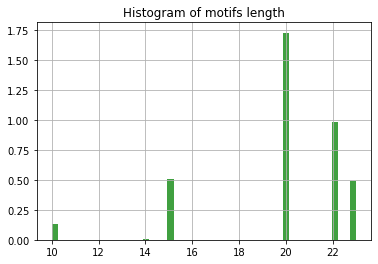

In [215]:
# the histogram of motifs length
x = [len(motifs_df.iat[i,0]) for i in range(0,len(motifs_df.index))]
min_len_motif = min(x)
max_len_motif = max(x)
print('Longueur minimum d"un motif : ', min(x))
print('Longueur maximal d"un motif : ', max(x))
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of motifs length')
plt.grid(True)
plt.show()

In [216]:
len_motifs = pd.DataFrame(x)
len_motifs.value_counts(ascending=True)

14      2
10     68
23    256
15    264
22    512
20    898
dtype: int64

In [217]:
occ_len_motifs = dict(len_motifs.value_counts(sort=True))
occ_len_motifs

{(20,): 898, (22,): 512, (15,): 264, (23,): 256, (10,): 68, (14,): 2}

In [218]:
nucl_counts = dict()
for i in range(0,len(motifs_df.index)):
  for i in motifs_df.iat[i,0]:
    nucl_counts[i] = nucl_counts.get(i, 0) + 1
nucl_counts

{'A': 9243, 'C': 10580, 'G': 11924, 'T': 8033}

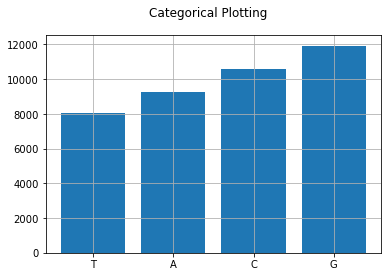

In [219]:
nucl_counts_sorted = { k : v for k, v in sorted(nucl_counts.items(), key=lambda item: item[1])}

names = list(nucl_counts_sorted.keys())
values = list(nucl_counts_sorted.values())

plt.bar(names, values)
plt.suptitle('Categorical Plotting')
plt.grid()
plt.show()

In [220]:
motifs_df.iloc[0,0][0]

'A'

In [221]:
#dire si une séquence est ou non motif

def est_motif(motifs_df,seq,seuil):
    n,m = len(motifs_df.index),len(seq)
    for i in range(n):
        cur_dist = 0
        if len(motifs_df.iat[i,0]) == m:
            for j in range(m):
                if motifs_df.iloc[i,0][j] == 'A' and seq[j] != 'A':
                    cur_dist +=1
                    #print("incrémente 1")
                elif motifs_df.iloc[i,0][j] == 'T' and seq[j] != 'T':
                    cur_dist +=1
                    #print("incrémente 2")
                elif motifs_df.iloc[i,0][j] == 'G' and seq[j] != 'G':
                    cur_dist +=1
                    #print("incrémente 3")
                elif motifs_df.iloc[i,0][j] == 'C' and seq[j] != 'C':
                    cur_dist +=1
                    #print("incrémente 4")
                #print('cur dist '+str(cur_dist)+ ' and '+' %'+str(int(seuil*m)+1))
    
            if cur_dist <= int(seuil*m)+1:
                return True
    return False

In [222]:
est_motif(motifs_df, 'GGCCGGGCGC', 0.1)

False

On prend la séquence d'adn du chromosome Y et on le met en majuscule

In [223]:
with open(human_chy) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq_ADN = []
    lengths = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq_ADN.append(seq_record.seq)
        lengths.append(len(seq_record.seq))
seq_ADN = str(seq_ADN[0])
seq_ADN = seq_ADN.upper()

In [224]:
i = 0
while seq_ADN[i] == 'N': 
    i+=1
seq_ADN = seq_ADN[i:]

In [225]:
seq_ADN[0:4]

'GGCC'

A présent, on a notre séquence d'adn dans une string et on a enlevé tous les N du début

In [256]:
for k, v in occ_len_motifs.items():
    print(occ_len_motifs[k])
    print(k[0])
    batchsize = k[0] #k est la longueur minimum du motif
    for nb_occ_len in range(0, occ_len_motifs[k]):
        print('ertr',nb_occ_len)

898
20
ertr 0
ertr 1
ertr 2
ertr 3
ertr 4
ertr 5
ertr 6
ertr 7
ertr 8
ertr 9
ertr 10
ertr 11
ertr 12
ertr 13
ertr 14
ertr 15
ertr 16
ertr 17
ertr 18
ertr 19
ertr 20
ertr 21
ertr 22
ertr 23
ertr 24
ertr 25
ertr 26
ertr 27
ertr 28
ertr 29
ertr 30
ertr 31
ertr 32
ertr 33
ertr 34
ertr 35
ertr 36
ertr 37
ertr 38
ertr 39
ertr 40
ertr 41
ertr 42
ertr 43
ertr 44
ertr 45
ertr 46
ertr 47
ertr 48
ertr 49
ertr 50
ertr 51
ertr 52
ertr 53
ertr 54
ertr 55
ertr 56
ertr 57
ertr 58
ertr 59
ertr 60
ertr 61
ertr 62
ertr 63
ertr 64
ertr 65
ertr 66
ertr 67
ertr 68
ertr 69
ertr 70
ertr 71
ertr 72
ertr 73
ertr 74
ertr 75
ertr 76
ertr 77
ertr 78
ertr 79
ertr 80
ertr 81
ertr 82
ertr 83
ertr 84
ertr 85
ertr 86
ertr 87
ertr 88
ertr 89
ertr 90
ertr 91
ertr 92
ertr 93
ertr 94
ertr 95
ertr 96
ertr 97
ertr 98
ertr 99
ertr 100
ertr 101
ertr 102
ertr 103
ertr 104
ertr 105
ertr 106
ertr 107
ertr 108
ertr 109
ertr 110
ertr 111
ertr 112
ertr 113
ertr 114
ertr 115
ertr 116
ertr 117
ertr 118
ertr 119
ertr 120
ertr 121
ertr 

In [244]:
def rolling_stone(liste_motifs,seq_ADN,seuil):
    non_motif_list = []
    x = [len(liste_motifs.iat[i,0]) for i in range(0,len(liste_motifs.index))]
    min_len_motif = min(x)
    max_len_motif = max(x)
    batchsize = max_len_motif - min_len_motif

    
    for k, v in occ_len_motifs.items():
        batchsize = k[0] #k est la longueur minimum du motif
        for nb_occ_len in range(0, occ_len_motifs[k]):
            print('batchsize :',batchsize )
            batch = seq_ADN[i: i+batchsize]
            print('batch :',batch )
            print('itnervale :',batchsize-min_len_motif )
            for j in range(0,batchsize-min_len_motif):
                if est_motif(liste_motifs,batch[0:j+min_len_motif],seuil) == False and batch[0:j+min_len_motif] not in non_motif_list: #On ajoute ce non-motif à la liste
                    non_motif_list.append(batch[0:j+min_len_motif])
                    break
                if len(non_motif_list) >= len(non_motif_list) + batchsize:
                    break
            if len(non_motif_list) >= 2000:
                    max_i = i
                    break
            
    print('max i : ',max_i)      
    return non_motif_list



In [245]:
non_motif_list = rolling_stone(motifs_df, seq_ADN, 0.6)

batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 10
batchsize : 20
batch : AAAATTCTTTTAAAGTTAAA
itnervale : 

KeyboardInterrupt: 

In [236]:
non_motif_list

['GGCCGGGCGCG',
 'GCCTGTAATCC',
 'GGGAGGCCAAG',
 'TCACGAGGTCA',
 'GACCATCTTGG',
 'CGAAACCCCGT',
 'AAATACAAAAA',
 'GGCGTAGTGGC',
 'TAGTGCCAGCT',
 'GCTGAGGCAGG',
 'TGAACCCGGGA',
 'TGCAGTGAGCT',
 'CCACTGCACTC',
 'CGACAGAGCGA',
 'TCAAAAAAAAA',
 'AAAAAAGTTAA',
 'TCGTTACATAA',
 'TACACATAGAC',
 'AGAAGGTATAT',
 'AAAACTTTATC',
 'GGGTCTGGTAA',
 'CATGCCTTCTC',
 'ACTTGTAGAAA',
 'TCTTCCTTCTC',
 'GCATCTCATTA',
 'AAAAAAATAGC',
 'CTCAATTTGCT',
 'CAAGGGGACTT',
 'CCTTACACTTC',
 'GCTCAAGGCCA',
 'ACCTGTTGGGG',
 'TCCATCTGGCT',
 'CTTAAAAAGAT',
 'CCTCAAAAAAC',
 'AATACTAGTTT',
 'AGTACTCTAAT',
 'GAGGAAGGATT',
 'CCTGACAACAA',
 'AAATTACATAG',
 'TTACAAAAATT',
 'GATATGAAGAA',
 'ACTAACAAACA',
 'AACTTTTTTTG',
 'TTGCTAAACGT',
 'TCTGTTAATTT',
 'AATCTACCAAC',
 'TCTCTGTCTAA',
 'CTTTCTGGTCA',
 'AGCATAGAGAT',
 'CATCAGCAATA',
 'AAGAAAACTGA',
 'AGAAATTCTGA',
 'GTAATGAGGGG',
 'CTAGCAGAAAA',
 'TTTTTATAACC',
 'ATTTTAACTAC',
 'TTCTGTGGTTA',
 'ACACTAACAGT',
 'TGGTGAGCATG',
 'GGAAAGCTCAG',
 'TGGCAGTGTGA',
 'AAAACCCTGGA',
 'GAAAGG

In [254]:
def rolling_stone1(liste_motifs,seq_ADN,seuil):
    non_motif_list = []
    x = [len(liste_motifs.iat[i,0]) for i in range(0,len(liste_motifs.index))]
    min_len_motif = min(x)
    max_len_motif = max(x)
    batchsize = max_len_motif - min_len_motif
    
    for i in range(0,len(seq_ADN), batchsize):
        batch = seq_ADN[i: i+batchsize]
        for j in range(0,batchsize-min_len_motif):
            if est_motif(liste_motifs,batch[0:j+min_len_motif],seuil) == False and batch[0:j+min_len_motif] not in non_motif_list: #On ajoute ce non-motif à la liste
                non_motif_list.append(batch[0:j+min_len_motif])
                break
            if len(non_motif_list) >= 2000:
                break
        if len(non_motif_list) >= 2000:
                max_i = i
                break
    print('max i : ',max_i)      
    return non_motif_list



In [255]:
non_motif_list = rolling_stone1(motifs_df, seq_ADN, 0.2)

max i :  25987


In [257]:
len(non_motif_list)

2000

Longueur minimum d"un motif :  10
Longueur maximal d"un motif :  12


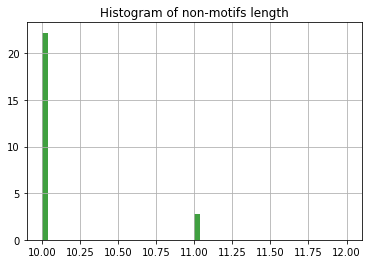

In [258]:
# the histogram of motifs length
x = [len(non_motif_list[i]) for i in range(0,len(non_motif_list))]
print('Longueur minimum d"un motif : ', min(x))
print('Longueur maximal d"un motif : ', max(x))
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)
plt.title('Histogram of non-motifs length')
plt.grid(True)
plt.show()